In [1]:
import pandas as pd
import numpy as np
from scipy.stats  import ttest_ind

# Two different methods of conducting a t-test
import researchpy as rp
from scipy import stats


In [44]:
# Read the data in
df = pd.read_csv(r"C:\Users\Ankit Dsouza\Desktop\tanushree notes\Talent analytics Case study file\Testing Hypothesis\employee.csv")

In [34]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Performance_Cycle', 'Appraisal_Result_Rating',
       'Engagement_Score'],
      dtype='object')

In [4]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...                  8                     0                1   
1  ...                 10                     3                3   
2  ...                  7                     3                3   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                   4                       0   
1              10                   7                       1   
2               0                   0                       0   

   YearsWithCurrManager Performance_Cycle  Appraisal_Result_Rating  \
0                     5              Half                        3   
1                     7              Half                        3   
2                     0              Half                        5   

   Appraisal_Result_Rating2  
0                        10  
1                         7  
2                         8  

[3 rows x 38 columns]

In [5]:
# Showing descriptive statistics from pandas.describe()
df.groupby("Performance_Cycle")['Appraisal_Result_Rating'].describe()

count      mean       std  min  25%  50%  75%   max
Performance_Cycle                                                      
Full                270.0  7.940741  1.484808  6.0  7.0  8.0  9.0  10.0
Half               1200.0  3.263333  2.057713  0.0  2.0  3.0  5.0   7.0

In [6]:
Full_data = df[(df['Performance_Cycle'] == 'Full')]
Full_data.reset_index(inplace= True)

Half_data = df[(df['Performance_Cycle'] == 'Half')]
Half_data.reset_index(inplace= True)

In [7]:
Full_data.head(2)

index  Age Attrition BusinessTravel  DailyRate              Department  \
0   1200   44        No  Travel_Rarely        528         Human Resources   
1   1201   23       Yes  Travel_Rarely       1320  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          3  Life Sciences              1  ...   
1                 8          1        Medical              1  ...   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      2               3               2   
1                  5                      2               3               5   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  \
0                   2                        2                    2   
1                   4                        1                    2   

   Performance_Cycle Appraisal_Result_Rating  Appraisal_Result_Rating2  
0               Full                      10                         0  
1               Full                       9                         9  

[2 rows x 39 columns]

In [9]:
diff = Full_data['Appraisal_Result_Rating'] - Half_data['Appraisal_Result_Rating']

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot= plt)
plt.title('Sepal Width P-P Plot') 
plt.savefig('Sepal Width Residuals.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


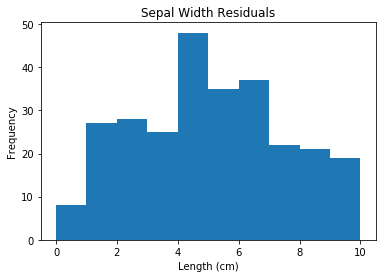

In [11]:
diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Sepal Width.png")

In [12]:
descriptives, results = rp.ttest(Full_data['Appraisal_Result_Rating'],Half_data['Appraisal_Result_Rating'])

descriptives

Variable       N      Mean        SD        SE  95% Conf.  \
0  Appraisal_Result_Rating   270.0  7.940741  1.484808  0.090363   7.762833   
1  Appraisal_Result_Rating  1200.0  3.263333  2.057713  0.059401   3.146792   
2                 combined  1470.0  4.122449  2.672498  0.069704   3.985719   

   Interval  
0  8.118648  
1  3.379875  
2  4.259179

In [13]:
results

Independent t-test    results
0  Difference (Appraisal_Result_Rating - Appraisa...     4.6774
1                              Degrees of freedom =   1468.0000
2                                               t =     35.3343
3                           Two side test p value =      0.0000
4                          Difference < 0 p value =      1.0000
5                          Difference > 0 p value =      0.0000
6                                       Cohen's d =      2.3800
7                                       Hedge's g =      2.3788
8                                   Glass's delta =      3.1502
9                                               r =      0.6779

# Another Method

In [14]:
twosample_results = ttest_ind(Full_data['Appraisal_Result_Rating'],Half_data['Appraisal_Result_Rating'])

In [15]:
twosample_results

Ttest_indResult(statistic=35.33431851563621, pvalue=1.9911927124218706e-198)

In [16]:
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

In [17]:
matrix_twosample = [['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]]

In [18]:
twosample_table = FF.create_table(matrix_twosample, index=True)
twosample_table

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:592: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



# Chi-square Test on Over time

In [19]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...                  8                     0                1   
1  ...                 10                     3                3   
2  ...                  7                     3                3   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                   4                       0   
1              10                   7                       1   
2               0                   0                       0   

   YearsWithCurrManager Performance_Cycle  Appraisal_Result_Rating  \
0                     5              Half                        3   
1                     7              Half                        3   
2                     0              Half                        5   

   Appraisal_Result_Rating2  
0                        10  
1                         7  
2                         8  

[3 rows x 38 columns]

In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Performance_Cycle', 'Appraisal_Result_Rating',
       'Appraisal_Result_Rating2'],
      dtype='object')

In [21]:
table, results = rp.crosstab(df['Attrition'], df['OverTime'], test= 'chi-square')
    
table

OverTime           
                No  Yes   All
Attrition                    
No             944  289  1233
Yes            110  127   237
All           1054  416  1470

In [22]:
table, results = rp.crosstab(df['Attrition'], df['OverTime'], prop= 'row', test= 'chi-square') #col
    
table

OverTime              
                No    Yes    All
Attrition                       
No           76.56  23.44  100.0
Yes          46.41  53.59  100.0
All          71.70  28.30  100.0

In [23]:
results

Chi-square test  results
0  Pearson Chi-square ( 1.0) =   89.0439
1                    p-value =    0.0000
2               Cramer's phi =    0.2461

# Chi-square Test Enagagement Score

In [45]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...                  8                     0                1   
1  ...                 10                     3                3   
2  ...                  7                     3                3   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                   4                       0   
1              10                   7                       1   
2               0                   0                       0   

   YearsWithCurrManager Performance_Cycle  Appraisal_Result_Rating  \
0                     5              Half                        3   
1                     7              Half                        3   
2                     0              Half                        5   

   Engagement_Score  
0             Amper  
1               Red  
2               Red  

[3 rows x 38 columns]

In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Performance_Cycle', 'Appraisal_Result_Rating',
       'Engagement_Score'],
      dtype='object')

In [48]:
table, results = rp.crosstab(df['Attrition'], df['Engagement_Score'], test= 'chi-square')
    
table

Engagement_Score                 
                     Amper Green  Red   All
Attrition                                  
No                     354    51  828  1233
Yes                     92    12  133   237
All                    446    63  961  1470

In [49]:
table, results = rp.crosstab(df['Attrition'], df['Engagement_Score'], prop= 'row', test= 'chi-square') #col
    
table

Engagement_Score                    
                     Amper Green    Red    All
Attrition                                     
No                   28.71  4.14  67.15  100.0
Yes                  38.82  5.06  56.12  100.0
All                  30.34  4.29  65.37  100.0

In [50]:
results

Chi-square test  results
0  Pearson Chi-square ( 2.0) =   10.7960
1                    p-value =    0.0045
2                 Cramer's V =    0.0857

#  Enagagement Score across Vertical

In [45]:
df.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0  ...                  8                     0                1   
1  ...                 10                     3                3   
2  ...                  7                     3                3   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                   4                       0   
1              10                   7                       1   
2               0                   0                       0   

   YearsWithCurrManager Performance_Cycle  Appraisal_Result_Rating  \
0                     5              Half                        3   
1                     7              Half                        3   
2                     0              Half                        5   

   Engagement_Score  
0             Amper  
1               Red  
2               Red  

[3 rows x 38 columns]

In [46]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Performance_Cycle', 'Appraisal_Result_Rating',
       'Engagement_Score'],
      dtype='object')

In [57]:
table, results = rp.crosstab(df['JobRole'], df['Engagement_Score'], test= 'chi-square')
    
table

Engagement_Score                 
                                    Amper Green  Red   All
JobRole                                                   
HealthcareRepresentative                0     0  131   131
HumanResources                          0    52    0    52
LaboratoryTechnician                    0     0  259   259
Manager                                37    11   54   102
ManufacturingDirector                   0     0  145   145
ResearchDirector                        0     0   80    80
ResearchScientist                       0     0  292   292
SalesExecutive                        326     0    0   326
SalesRepresentative                    83     0    0    83
All                                   446    63  961  1470

In [58]:
table, results = rp.crosstab(df['JobRole'], df['Engagement_Score'], prop= 'row', test= 'chi-square') #col
    
table

Engagement_Score                       
                                    Amper   Green     Red    All
JobRole                                                         
HealthcareRepresentative             0.00    0.00  100.00  100.0
HumanResources                       0.00  100.00    0.00  100.0
LaboratoryTechnician                 0.00    0.00  100.00  100.0
Manager                             36.27   10.78   52.94  100.0
ManufacturingDirector                0.00    0.00  100.00  100.0
ResearchDirector                     0.00    0.00  100.00  100.0
ResearchScientist                    0.00    0.00  100.00  100.0
SalesExecutive                     100.00    0.00    0.00  100.0
SalesRepresentative                100.00    0.00    0.00  100.0
All                                 30.34    4.29   65.37  100.0

In [59]:
results

Chi-square test    results
0  Pearson Chi-square ( 16.0) =   2594.4281
1                     p-value =      0.0000
2                  Cramer's V =      0.9394